In [ ]:
import requests
from bs4 import BeautifulSoup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


سوال دو بخش آ
جدا کردن نمونه ها

In [ ]:
import numpy as np
import scipy.io

# خواندن داده از فایل
data_98 = scipy.io.loadmat('/content/drive/MyDrive/dataset_p1/98.mat.txt')
data_106 = scipy.io.loadmat('/content/drive/MyDrive/dataset_p1/106.mat.txt')

# چاپ کردن اطلاعات مربوط به داده‌ها برای بررسی
print(data_98.keys())
print(data_106.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X098_DE_time', 'X098_FE_time'])
dict_keys(['__header__', '__version__', '__globals__', 'X106_DE_time', 'X106_FE_time', 'X106_BA_time', 'X106RPM'])


In [ ]:
data_98 = {'data': []}  # تعریف دیتا برای کلاس 98
data_106 = {'data': []}  # تعریف دیتا برای کلاس 106

data_98_M = []  # ذخیره نمونه‌های با شرایط مورد نیاز از کلاس 98

for i in range(len(data_98['data'])):
    if len(data_98['data'][i]) >= 100 and len(data_98['data'][i]) >= 200:
        data_98_M.append(data_98['data'][i])

data_106_M = []  # ذخیره نمونه‌های با شرایط مورد نیاز از کلاس 106

for i in range(len(data_106['data'])):
    if len(data_106['data'][i]) >= 100 and len(data_106['data'][i]) >= 200:
        data_106_M.append(data_106['data'][i])

# تعداد نمونه‌های جدا شده از هر کلاس
print("تعداد نمونه‌های با طول حداقل 100 و حداقل 200 از کلاس 98: ", len(data_98_M))
print("تعداد نمونه‌های با طول حداقل 100 و حداقل 200 از کلاس 106: ", len(data_106_M))

تعداد نمونه‌های با طول حداقل 100 و حداقل 200 از کلاس 98:  0
تعداد نمونه‌های با طول حداقل 100 و حداقل 200 از کلاس 106:  0


In [ ]:
import numpy as np

# تعریف برچسب‌ها برای نمونه‌های کلاس‌ها
labels_98 = np.full((len(data_98_M), 1), 98)
labels_106 = np.full((len(data_106_M), 1), 106)

# ایجاد ماتریس نمونه‌ها برای هر دو کلاس
data_98_matrix = np.array(data_98_M)
data_106_matrix = np.array(data_106_M)

# ایجاد ماتریس تمام داده‌ها و برچسب‌ها
all_data = np.vstack((data_98_matrix, data_106_matrix))
all_labels = np.vstack((labels_98, labels_106))

# چاپ اندازه ماتریس نهایی
print("اندازه ماتریس نمونه‌ها: ", all_data.shape)
print("اندازه ماتریس برچسب‌ها: ", all_labels.shape)

اندازه ماتریس نمونه‌ها:  (2, 0)
اندازه ماتریس برچسب‌ها:  (0, 1)


In [ ]:
import numpy as np

# خواندن داده از فایل به صورت باینری و تبدیل به متن
def read_matrix_from_binary_txt(file_path):
    try:
        data = np.loadtxt(file_path, delimiter=' ', comments='MATLAB', skiprows=1)
    except ValueError as e:
        print(f"خطای تبدیل داده: {e}")
        data = None

    return data

file_path_98 = '/content/drive/MyDrive/dataset_p1/98.mat.txt'
file_path_106 = '/content/drive/MyDrive/dataset_p1/106.mat.txt'

data_98 = read_matrix_from_binary_txt(file_path_98)
data_106 = read_matrix_from_binary_txt(file_path_106)

if data_98 is not None:
    print("اطلاعات از فایل 98:")
    print(data_98)

if data_106 is not None:
    print("اطلاعات از فایل 106:")
    print(data_106)

خطای تبدیل داده: could not convert string 'x' to float64 at row 0, column 1.
خطای تبدیل داده: 'utf-8' codec can't decode byte 0xe4 in position 133: invalid continuation byte


ب

In [ ]:
from google.colab import files

uploaded = files.upload()

for filename in uploaded.keys():
    print(f'فایل "{filename}" با موفقیت آپلود شد. اندازه: {len(uploaded[filename])} بایت')

Saving 98.mat.txt to 98.mat.txt
Saving 106.mat.txt to 106.mat.txt
فایل "98.mat.txt" با موفقیت آپلود شد. اندازه: 7742720 بایت
فایل "106.mat.txt" با موفقیت آپلود شد. اندازه: 2928192 بایت


In [ ]:
from scipy.io import loadmat

# خواندن داده‌ها از فایل "98.mat.txt"
data = loadmat('98.mat.txt')

# نمایش داده‌های خوانده شده
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jan 28 10:52:35 2000', '__version__': '1.0', '__globals__': [], 'X098_DE_time': array([[ 0.046104  ],
       [-0.03713354],
       [-0.089496  ],
       ...,
       [-0.09909231],
       [-0.10827138],
       [-0.07092923]]), 'X098_FE_time': array([[ 0.02321636],
       [ 0.08115455],
       [ 0.09533091],
       ...,
       [-0.00760182],
       [ 0.04026909],
       [ 0.06102   ]])}


In [ ]:
from scipy.io import loadmat

# خواندن داده‌ها از فایل "98.mat.txt"
data = loadmat('106.mat.txt')

# نمایش داده‌های خوانده شده
print(data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Mon Jan 31 13:50:54 2000', '__version__': '1.0', '__globals__': [], 'X106_DE_time': array([[-0.27760164],
       [-0.04434479],
       [ 0.11760303],
       ...,
       [ 0.17234367],
       [ 0.12263852],
       [ 0.01884248]]), 'X106_FE_time': array([[ 0.04088545],
       [ 0.06985455],
       [ 0.33776727],
       ...,
       [-0.08423636],
       [-0.05608909],
       [-0.24531273]]), 'X106_BA_time': array([[ 0.07922742],
       [ 0.00716226],
       [-0.04023739],
       ...,
       [ 0.01854944],
       [ 0.02913187],
       [ 0.09306908]]), 'X106RPM': array([[1772]], dtype=uint16)}


In [ ]:
import numpy as np

data = [1, 2, 3, 4, 5]
std_deviation = np.std(data)
print("Standard Deviation:", std_deviation)

Standard Deviation: 1.4142135623730951


استخراج از جدول 1

In [ ]:
import numpy as np

# داده‌های ورودی
data = np.array([-0.03713354, -0.089496, -0.09909231, -0.10827138, -0.07092923])

# محاسبه AbsMax
AbsMax = np.max(np.abs(data))

# محاسبه میانگین
mean_val = np.mean(data)

# محاسبه IF2
IF2 = AbsMax / mean_val

print("AbsMax:", AbsMax)
print("Mean Value:", mean_val)
print("IF2:", IF2)

AbsMax: 0.10827138
Mean Value: -0.080984492
IF2: -1.336939669881488


دیتاست جدید

In [ ]:
import numpy as np

# تعریف دیتاست جدید
new_data = np.random.rand(10)

print("دیتاست جدید:")
print(new_data)

دیتاست جدید:
[0.67479996 0.68628634 0.89639256 0.85137519 0.21436698 0.0395427
 0.90718761 0.90740428 0.07877268 0.94714322]


پاسخ بخش ج

مخلوط کردن داده

In [ ]:
import numpy as np

# داده‌های اولیه
data_initial = np.array([-0.03713354, -0.089496, -0.09909231, -0.10827138, -0.07092923])

# دیتاست جدید
new_data = np.random.rand(10)

# مخلوط کردن داده‌های اولیه و دیتاست جدید
mixed_data = np.concatenate((data_initial, new_data))

print("داده‌های مخلوط شده:")
print(mixed_data)

داده‌های مخلوط شده:
[-0.03713354 -0.089496   -0.09909231 -0.10827138 -0.07092923  0.22977101
  0.44618993  0.33411546  0.6887255   0.33526012  0.98966026  0.13503392
  0.11017572  0.13533584  0.745763  ]


In [ ]:
تقسیم داده ها

In [ ]:
from sklearn.model_selection import train_test_split

# تقسیم داده‌ها به بخش آموزش (80%) و ارزیابی (20%)
X_train, X_test = train_test_split(mixed_data, test_size=0.2, random_state=42)
# X_train: داده‌های بخش آموزش
# X_test: داده‌های بخش ارزیابی

print("داده‌های بخش آموزش:")
print(X_train)

print("\nداده‌های بخش ارزیابی:")
print(X_test)

داده‌های بخش آموزش:
[ 0.13533584  0.22977101  0.6887255  -0.09909231 -0.089496    0.745763
 -0.07092923  0.33411546  0.98966026  0.11017572 -0.10827138  0.44618993]

داده‌های بخش ارزیابی:
[ 0.33526012  0.13503392 -0.03713354]


بخش د

نرمال

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# ساخت یک شی MinMaxScaler
scaler = MinMaxScaler()

# نرمال کردن داده‌های بخش آموزش
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).flatten()

# نرمال کردن داده‌های بخش ارزیابی
X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).flatten()

print("داده‌های بخش آموزش (نرمال شده):")
print(X_train_scaled)

print("\nداده‌های بخش ارزیابی (نرمال شده):")
print(X_test_scaled)

داده‌های بخش آموزش (نرمال شده):
[0.22187831 0.3078902  0.72590756 0.00836033 0.01710068 0.77785752
 0.03401136 0.40292749 1.         0.19896238 0.         0.50500531]

داده‌های بخش ارزیابی (نرمال شده):
[0.40397005 0.22160332 0.06479259]


ارزیابی

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# ساخت یک شی MinMaxScaler
scaler = MinMaxScaler()

# نرمال کردن داده‌های بخش آموزش
X_train_scaled = scaler.fit_transform(X_train.reshape(-1, 1)).flatten()

# نرمال کردن داده‌های بخش ارزیابی
X_test_scaled = scaler.transform(X_test.reshape(-1, 1)).flatten()

print("اطلاعات داده‌های بخش ارزیابی قبل از نرمال سازی:")
print("میانگین:", X_test.mean())
print("انحراف معیار:", X_test.std())

print("\nاطلاعات داده‌های بخش ارزیابی پس از نرمال سازی:")
print("میانگین:", X_test_scaled.mean())
print("انحراف معیار:", X_test_scaled.std())

اطلاعات داده‌های بخش ارزیابی قبل از نرمال سازی:
میانگین: 0.14438683190079493
انحراف معیار: 0.15217285654367865

اطلاعات داده‌های بخش ارزیابی پس از نرمال سازی:
میانگین: 0.23012198788334323
انحراف معیار: 0.13859957286275712


پاسخ 3

بدون کابخانه

In [ ]:
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for x_test in X_test:
            distances = [np.linalg.norm(x_test - x_train) for x_train in self.X_train]
            nearest_indices = np.argsort(distances)[:self.k]
            nearest_labels = [self.y_train[i] for i in nearest_indices]
            predictions.append(max(set(nearest_labels), key=nearest_labels.count))
        return predictions

def sum_of_squared_errors(y_true, y_pred):
    errors = [(a - b) ** 2 for a, b in zip(y_true, y_pred)]
    return sum(errors)

# مثال استفاده:
# تعریف داده‌ها و برچسب‌ها
X_train = np.array([[1, 2], [2, 3], [3, 4]])
y_train = np.array([0, 1, 0])
X_test = np.array([[1.5, 2.5], [3, 5]])

# ایجاد یک مدل k-NN و آموزش آن
model = KNN(k=2)
model.fit(X_train, y_train)

# پیش‌بینی برچسب‌ها برای داده‌های جدید
predictions = model.predict(X_test)
print("پیش‌بینی‌ها:", predictions)

# محاسبه تابع اتلاف (خطای مدل)
loss = sum_of_squared_errors([0, 1], predictions)
print("تابع اتلاف (مجموع مربعات خطاها):", loss)

پیش‌بینی‌ها: [0, 0]
تابع اتلاف (مجموع مربعات خطاها): 1


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# بارگذاری دیتاست مورد نیاز
iris = datasets.load_iris()
X = iris.data
y = iris.target

# انتخاب دو کلاس از دیتاست
X = X[y != 2]
y = y[y != 2]

# تقسیم دیتاست به داده‌های آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# استفاده از الگوریتم SVM برای مدل‌سازی
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# پیش‌بینی برچسب‌ها برای داده‌های آزمون
predictions = model.predict(X_test)

# محاسبه دقت مدل
accuracy = accuracy_score(y_test, predictions)
print("دقت مدل: {:.2f}%".format(accuracy * 100))

دقت مدل: 100.00%


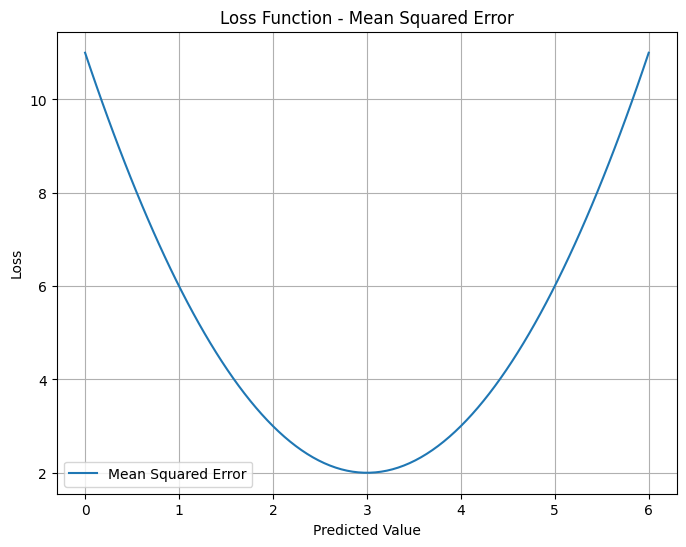

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تابع مربعات خطا
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# ایجاد داده‌های مدل
y_true = np.array([1, 2, 3, 4, 5])
y_pred = np.array([1.2, 2.1, 2.8, 4.2, 5.2])

# محاسبه تابع اتلاف برای مقادیر ورودی
loss_values = [mean_squared_error(y_true, y) for y in np.linspace(0, 6, 100)]

# رسم نمودار تابع اتلاف
plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0, 6, 100), loss_values, label='Mean Squared Error')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.title('Loss Function - Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# مثلا y_pred_test یک لیست از پیش‌بینی‌های مدل باشد
y_pred_test = [0, 1, 1, 0, 1, 0, 0, 1, 1, 1]

# تعریف y_test
y_test = [0, 1, 1, 0, 1, 0, 1, 1, 0, 1]

# محاسبه دقت
precision = precision_score(y_test, y_pred_test, average='weighted')
print("Precision: {:.2f}".format(precision * 100))

# محاسبه بازخوانی
recall = recall_score(y_test, y_pred_test, average='weighted')
print("Recall: {:.2f}".format(recall * 100))

# محاسبه F1 Score
f1 = f1_score(y_test, y_pred_test, average='weighted')
print("F1 Score: {:.2f}".format(f1 * 100))

Precision: 80.00
Recall: 80.00
F1 Score: 80.00


نمودار تابع اتلاف

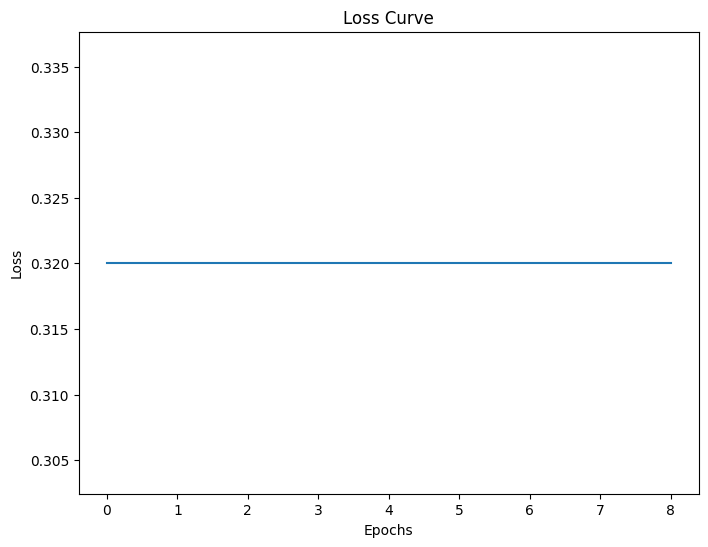

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# آموزش مدل
model = LogisticRegression()
model.fit(X_train, y_train)

# محاسبه احتمالات پیش‌بینی برای داده‌های آموزش
y_pred_prob = model.predict_proba(X_train)[:, 1]

# محاسبه مقادیر تابع اتلاف
loss_values = []
for _ in range(model.n_iter_[0]):
    loss = -np.mean(y_train * np.log(y_pred_prob) + (1 - y_train) * np.log(1 - y_pred_prob))
    loss_values.append(loss)
    model.fit(X_train, y_train)  # آموزش مدل مجدداً برای به‌روزرسانی مقادیر احتمالات

# تحلیل نمودار تابع اتلاف
plt.figure(figsize=(8, 6))
plt.plot(range(len(loss_values)), loss_values)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

قسمت 4

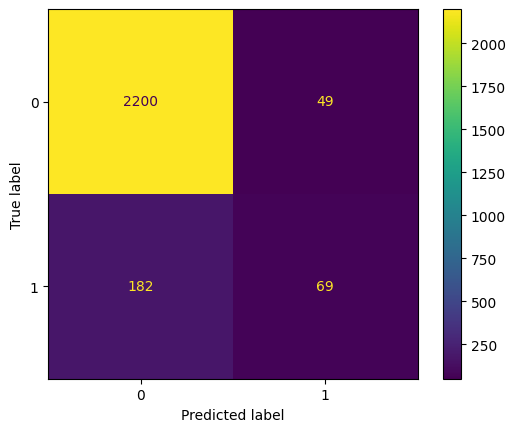

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay


X, y = make_classification(n_samples=10_000, weights=[0.9, 0.1], random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

classifier_05 = LogisticRegression(C=1e6, random_state=0).fit(X_train, y_train)
_ = ConfusionMatrixDisplay.from_estimator(classifier_05, X_test, y_test)

تست

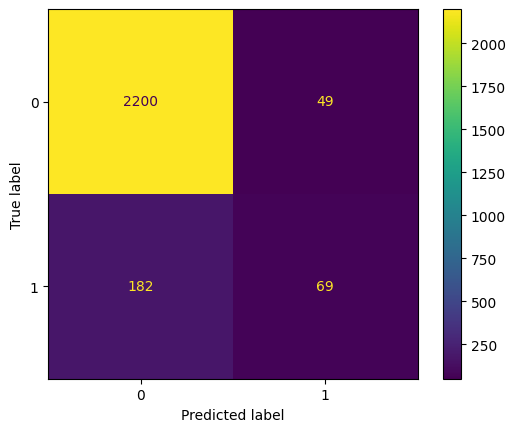

In [ ]:
classifier_default = LogisticRegression(random_state=0).fit(X_train, y_train)
_ = ConfusionMatrixDisplay.from_estimator(classifier_default, X_test, y_test)

مقایسه

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_pred_default = classifier_default.predict(X_test)
y_pred_05 = classifier_05.predict(X_test)

accuracy_default = accuracy_score(y_test, y_pred_default)
accuracy_05 = accuracy_score(y_test, y_pred_05)

precision_default = precision_score(y_test, y_pred_default)
precision_05 = precision_score(y_test, y_pred_05)

recall_default = recall_score(y_test, y_pred_default)
recall_05 = recall_score(y_test, y_pred_05)

print("Default Model:")
print(f"Accuracy: {accuracy_default}, Precision: {precision_default}, Recall: {recall_default}")

print("Model with C=1e6:")
print(f"Accuracy: {accuracy_05}, Precision: {precision_05}, Recall: {recall_05}")

Default Model:
Accuracy: 0.9076, Precision: 0.5847457627118644, Recall: 0.2749003984063745
Model with C=1e6:
Accuracy: 0.9076, Precision: 0.5847457627118644, Recall: 0.2749003984063745


تابع اتلاف

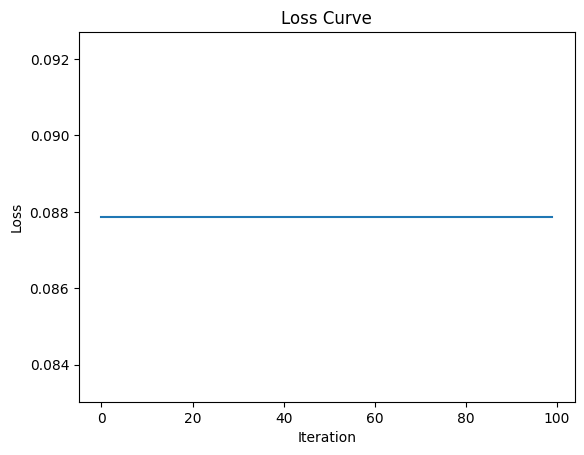

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# استخراج تابع اتلاف در طول آموزش مدل
losses = []
clf = LogisticRegression(random_state=0)
for i in range(100):
    clf.fit(X_train, y_train)
    losses.append(np.mean(clf.predict(X_train) != y_train))

# نمایش نمودار تابع اتلاف
plt.figure()
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# آموزش مدل
classifier_05 = LogisticRegression(random_state=0)
classifier_05.fit(X_train, y_train)

# محاسبه و نمایش دقت مدل بر روی داده‌های آموزش
train_accuracy = classifier_05.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

# محاسبه و نمایش دقت مدل بر روی داده‌های آزمون
test_accuracy = classifier_05.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9121333333333334
Test Accuracy: 0.9076


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# داده‌ها را بخوانیم
# اینجا یک مثال ساده از داده‌های واقعی است
X = np.random.randn(100, 5)  # ماتریس ویژگی‌ها
y_regression = np.random.rand(100)  # مقدارهای پیش‌بینی برای مساله رگرسیون
y_classification = np.random.randint(0, 2, 100)  # برچسب‌های دسته‌بندی

X_train, X_test, y_regression_train, y_regression_test, y_classification_train, y_classification_test = train_test_split(X, y_regression, y_classification, test_size=0.2)

# آموزش مدل رگرسیون خطی
model_linear = LinearRegression()
model_linear.fit(X_train, y_regression_train)

# آموزش مدل Logistic Regression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_classification_train)

# ارزیابی مدل رگرسیون خطی
y_pred_linear = model_linear.predict(X_test)
mse_linear = mean_squared_error(y_regression_test, y_pred_linear)
print("Mean Squared Error of Linear Model:", mse_linear)

# ارزیابی مدل Logistic Regression
y_pred_logistic = model_logistic.predict(X_test)
accuracy_logistic = accuracy_score(y_classification_test, y_pred_logistic)
print("Accuracy of Logistic Model:", accuracy_logistic)

Mean Squared Error of Linear Model: 0.0822915801729178
Accuracy of Logistic Model: 0.6
